<a href="https://colab.research.google.com/github/shayan-hm/OR1/blob/main/Solve_L_P_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
from pyomo.environ import value
!pip install pyomo
!apt-get install -y glpk-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
glpk-utils is already the newest version (5.0-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
model = ConcreteModel()
model.x = Var(domain=NonNegativeReals)
model.y = Var(domain=NonNegativeReals)

In [ ]:
# z = x + y
model.obj = Objective(expr=model.x +  model.y, sense=maximize)

In [ ]:
# S.T.
model.constraints = ConstraintList()
model.constraints.add(model.x + model.y <= 3)
model.constraints.add(-model.x + model.y <= 1)
model.constraints.add(2 *model.x + model.y >= 1)

In [ ]:
solver = SolverFactory('glpk', executable='/usr/bin/glpsol')
solver.solve(model)

{'Problem': [{'Name': 'unknown', 'Lower bound': 3.0, 'Upper bound': 3.0, 'Number of objectives': 1, 'Number of constraints': 3, 'Number of variables': 2, 'Number of nonzeros': 6, 'Sense': 'maximize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': 0, 'Number of created subproblems': 0}}, 'Error rc': 0, 'Time': 0.009997367858886719}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [ ]:
x_optimal = value(model.x)
y_optimal = value(model.y)
z_optimal = value(model.obj)

print(f"x = {x_optimal:.2f}, y = {y_optimal:.2f}, Z = {z_optimal:.2f}")

x = 3.00, y = 0.00, Z = 3.00


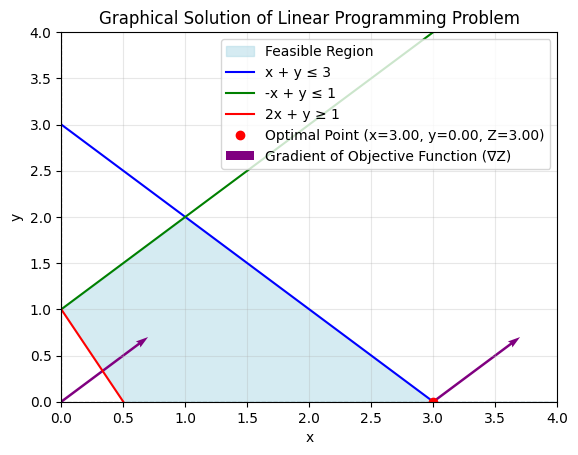

In [ ]:
x = np.linspace(0, 4, 200)
y1 = 3 - x          # x + y ≤ 3  => y ≤ 3 - x
y2 = x + 1          # -x + y ≤ 1 => y ≤ x + 1
y3 = 1 - 2 * x      # 2x + y ≥ 1 => y ≥ 1 - 2x


x_intersect1_2 = 1
y_intersect1_2 = 2


x_intersect2_3 = 0
y_intersect2_3 = 1
plt.fill_between(x,
                 np.maximum(np.maximum(y3, 0), 0),
                 np.minimum(y1, y2),
                 where=(x >= 0),
                 color='lightblue',
                 alpha=0.5,
                 label='Feasible Region')
plt.plot(x, y1, 'b', label='x + y ≤ 3')
plt.plot(x, y2, 'g', label='-x + y ≤ 1')
plt.plot(x, y3, 'r', label='2x + y ≥ 1')
plt.axvline(0, color='k', linestyle='--', linewidth=0.8)
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
plt.plot(x_optimal, y_optimal, 'ro', label=f"Optimal Point (x={x_optimal:.2f}, y={y_optimal:.2f}, Z={z_optimal:.2f})")

plt.xlim(0, 4)
plt.ylim(0, 4)
plt.grid(True, alpha=0.3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Graphical Solution of Linear Programming Problem")
#

# The gradient vector for Z = x + y is (∂Z/∂x, ∂Z/∂y)
# ∂Z/∂x = 1
# ∂Z/∂y = 1

start_point_x = x_optimal
start_point_y = y_optimal

grad_x = 1
grad_y = 1


scale_factor = 0.7


plt.quiver(start_point_x, start_point_y, grad_x, grad_y, angles='xy', scale_units='xy', scale=1/scale_factor, color='purple', label='Gradient of Objective Function (∇Z)', width=0.005)
plt.quiver(0, 0, grad_x, grad_y, angles='xy', scale_units='xy', scale=1/scale_factor, color='purple', width=0.005)

plt.legend(loc='upper right')

plt.show()